In [16]:
# script that analyzes and computes figures for experimental data on PEX interactions
import db_utils
import AF_plot_functions
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import leastsq
from matplotlib import gridspec
import matplotlib
#matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'Arial'
%matplotlib inline

from matplotlib.ticker import FormatStrFormatter

connect = db_utils.get_connection()
cursor = connect.cursor()

path = '/Users/luck/IMB/projects/AlphaFold/exp_data_analysis/'

In [17]:
def get_saturation_curve_data(project_id,NL_id,mCit_id,connect,FL_id):
    titration_query = f"""select a.project_id,a.NL_plasmid,a.mCit_plasmid,a.NL_property,a.mCit_property,
                c.measurement/d.measurement BRET,a.NL_plasmid_id,a.mCit_plasmid_id,a.plate_id,b.avg_FL,
                e.measurement totLu 
                from luthy_data.plate_layout a, luthy_data.FL_avg_points b, luthy_data.LU_raw c, 
                    luthy_data.LU_raw d, luthy_data.LU_raw e 
                where a.project_id='{project_id}' and a.include=1 and a.project_id=b.project_id and 
                    a.project_id=c.project_id and a.project_id=d.project_id and a.project_id=e.project_id and 
                    a.plate_id=b.plate_id and a.plate_id=c.plate_id and a.plate_id=d.plate_id and 
                    a.plate_id=e.plate_id and a.well_id=b.well_id and a.well_id=c.well_id and 
                    a.well_id=d.well_id and a.well_id=e.well_id and a.NL_plasmid_id='{NL_id}' and 
                    a.mCit_plasmid_id='{mCit_id}' and c.measurement_id='accLu01' and d.measurement_id='donLu01' 
                    and e.measurement_id='totLu01' and b.measurement_id='{FL_id}'"""
    bleedthrough_query = f"""select c.measurement/d.measurement bleedthrough,a.plate_id
                from luthy_data.plate_layout a, luthy_data.LU_raw c, luthy_data.LU_raw d
                where a.project_id='{project_id}' and a.include=1 and a.project_id=c.project_id and 
                    a.project_id=d.project_id and a.plate_id=c.plate_id and a.plate_id=d.plate_id and 
                    a.well_id=c.well_id and a.well_id=d.well_id and a.NL_plasmid_id='KL_03' and 
                    a.mCit_plasmid_id='empty' and c.measurement_id='accLu01' and d.measurement_id='donLu01'"""
    bkg_query = f"""select b.avg_FL bkg_FL,c.measurement bkg_LU,a.plate_id
                    from luthy_data.plate_layout a, luthy_data.FL_avg_points b, luthy_data.LU_raw c 
                    where a.project_id='{project_id}' and a.include=1 and a.project_id=b.project_id and 
                        a.project_id=c.project_id and a.plate_id=b.plate_id and a.plate_id=c.plate_id and 
                        a.well_id=b.well_id and a.well_id=c.well_id and a.NL_plasmid_id='KL_01' and 
                        a.mCit_plasmid_id='empty' and b.measurement_id='{FL_id}' and c.measurement_id='totLu01'"""

    BRET_df = pandas.read_sql(titration_query,connect)
    BT_df = pandas.read_sql(bleedthrough_query,connect)
#    print(BT_df)
    bkg_df = pandas.read_sql(bkg_query,connect)
#    print(bkg_df)
    
    BRET_df['norm_BRET'] = BRET_df['BRET'] - np.mean(list(BT_df['bleedthrough']))
    BRET_df['expr_ratio'] = (BRET_df['avg_FL'] - np.mean(list(bkg_df['bkg_FL'])))/(BRET_df['totLu'] - np.mean(list(bkg_df['bkg_LU'])))
#    print(BRET_df)
    
    return BRET_df

('KL_511', 'KL_662', 'Lu128r01', 'FL01')
('KL_511', 'KL_816', 'Lu128r01', 'FL01')
('KL_808', 'KL_662', 'Lu128r01', 'FL01')
('KL_809', 'KL_662', 'Lu128r01', 'FL01')


/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_1545/4148587726.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  BRET_df = pandas.read_sql(titration_query,connect)
/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_1545/4148587726.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  BT_df = pandas.read_sql(bleedthrough_query,connect)
/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_1545/4148587726.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  bkg_df = pandas.read_sql(bkg_query,connect

('KL_511', 'KL_662', 'Lu129r01', 'FL01')
('KL_511', 'KL_816', 'Lu129r01', 'FL01')
('KL_808', 'KL_662', 'Lu129r01', 'FL01')
('KL_809', 'KL_662', 'Lu129r01', 'FL01')


/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_1545/4148587726.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  bkg_df = pandas.read_sql(bkg_query,connect)
/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_1545/3242236919.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bret_expr_df = bret_expr_df.append(BRET_df,ignore_index=True)
/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_1545/3242236919.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bret50_df = bret50_df.append({'pair':pair_label,'project_id':plasmid_pair[2],'plate_id':plate_id,
/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_1545/3242236919.py

('KL_511', 'KL_662', 'Lu132r01', 'FL01')
('KL_511', 'KL_835', 'Lu132r01', 'FL01')
('KL_511', 'KL_662', 'Lu133r01', 'FL01')
('KL_511', 'KL_835', 'Lu133r01', 'FL01')


/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_1545/4148587726.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  BRET_df = pandas.read_sql(titration_query,connect)
/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_1545/4148587726.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  BT_df = pandas.read_sql(bleedthrough_query,connect)
/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_1545/4148587726.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  bkg_df = pandas.read_sql(bkg_query,connect

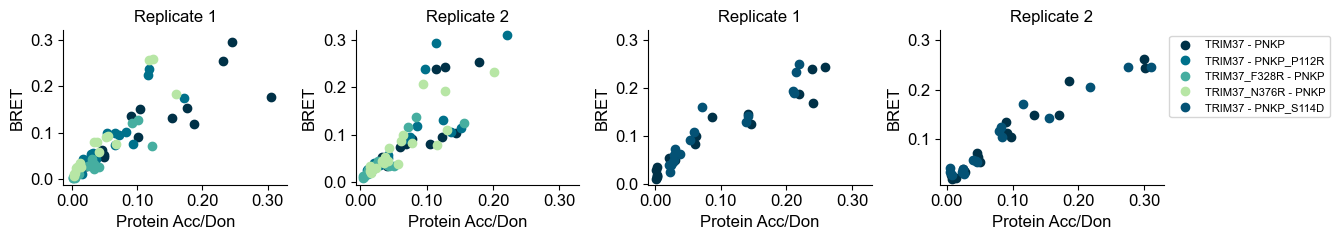

In [20]:
# plot titration curves, fit the data and compute BRET 50
plasmid_pair_sets = [
    [('KL_511','KL_662','Lu128r01','FL01'),('KL_511','KL_816','Lu128r01','FL01'),               
                 ('KL_808','KL_662','Lu128r01','FL01'),('KL_809','KL_662','Lu128r01','FL01')],
    [('KL_511','KL_662','Lu129r01','FL01'),('KL_511','KL_816','Lu129r01','FL01'),               
                 ('KL_808','KL_662','Lu129r01','FL01'),('KL_809','KL_662','Lu129r01','FL01')],
    [('KL_511','KL_662','Lu132r01','FL01'),('KL_511','KL_835','Lu132r01','FL01')],
    [('KL_511','KL_662','Lu133r01','FL01'),('KL_511','KL_835','Lu133r01','FL01')] 
                    ]

labels_colors = {('KL_511','KL_662'):('TRIM37 - PNKP','#003147'),
          ('KL_511','KL_816'):('TRIM37 - PNKP_P112R','#00718B'),
          ('KL_808','KL_662'):('TRIM37_F328R - PNKP','#46AEA0'),
          ('KL_809','KL_662'):('TRIM37_N376R - PNKP','#B7E6A5'),
          ('KL_511','KL_835'):('TRIM37 - PNKP_S114D','#045275')}

titles = ['Replicate 1','Replicate 2','Replicate 1','Replicate 2']


# create dict where data is safed
fit_dict = {}

# create df to save BRET50 and BRETmax
bret50_df = pandas.DataFrame({'pair':[],'project_id':[],'plate_id':[],'bret50':[],'bret50_err':[],'bretmax':[],
                              'bretmax_err':[],'color':[],'NL_plasmid_id':[],'mCit_plasmid_id':[]})

# create df to save BRET values and avg expression values
bret_expr_df = pandas.DataFrame({'project_id':[],'NL_plasmid':[],'mCit_plasmid':[],'NL_property':[],'mCit_property':[],
                                 'BRET':[],'NL_plasmid_id':[],'mCit_plasmid_id':[],'plate_id':[],
                                 'avg_FL':[],'totLu':[],'norm_BRET':[],'expr_ratio':[]})
#set the size of the figure plot
plt.figure(figsize=(13.5,2.5))

artist_collection = []
labels_collection = []

for p,plasmid_pairs in enumerate(plasmid_pair_sets):

    plt.subplot(1,4,p+1)

    for i,plasmid_pair in enumerate(plasmid_pairs):
        print(plasmid_pair)
        pair_label = labels_colors[(plasmid_pair[0],plasmid_pair[1])][0]
        pair_color = labels_colors[(plasmid_pair[0],plasmid_pair[1])][1]
        BRET_df = get_saturation_curve_data(plasmid_pair[2],plasmid_pair[0],plasmid_pair[1],connect,plasmid_pair[3])
        BRET_df.sort_values(['plate_id','expr_ratio'],inplace=True)
#        print(BRET_df)
        bret_expr_df = bret_expr_df.append(BRET_df,ignore_index=True)
        plate_ids = list(set(list(BRET_df['plate_id'])))
#        print(plate_ids)
        
        for plate_id in plate_ids:

            sub_df = BRET_df.loc[BRET_df['plate_id']==plate_id,['expr_ratio','norm_BRET']].reset_index()
            adr_list = sub_df['expr_ratio']
            bret_list = sub_df['norm_BRET']
            # here, create lambda function to define the equation that describes the saturation curve
            func = lambda par,adr : par[0]*adr/(par[1] + adr)
            # ErrorFunc is the diference between the func and the y "experimental" data
            ErrorFunc = lambda par,adr,bret: func(par,adr)-bret
            #tplInitial contains the "first guess" of the parameters 
            Initial1 = (bret_list[len(bret_list)-1],0.01)
            # leastsq finds the parameter bret_max and kd that minimize ErrorFunc=yfit-yExperimental
            #JMS: Changed below line to output all objects from leastsq() - of interest is 'pcov'
            final,pcov,lsdict,lsmesg,success=leastsq(ErrorFunc,Initial1,args=(adr_list,bret_list),full_output=True)
            xx1=np.linspace(adr_list.min(),adr_list.max(),50)
            yy1=func(final,xx1)
            bret_max = final[0]
            bret50 = final[1]

            # JMS: Compute std err for bret50 (according to statistical estimate of error for an estimated parameter)
            #      Calculate residual variance
            s_sq = (ErrorFunc(final,adr_list,bret_list)**2).sum()/(len(bret_list)-len(final))
            #      Multiply residual variance by fractional covariance matrix supplied by leastsq() <- this is the variance-covariance matrix
            pcov = s_sq * pcov
            #      Extract standard error: square root of values along the diagonal of variance-covariance matrix
            sterr_bret50 = (np.absolute(pcov[1][1]))**(1/2)
            sterr_bretmax = (np.absolute(pcov[0][0]))**(1/2)

            # safe data in dict
            xx1_l = xx1.tolist()
            yy1_l = yy1.tolist()
            plasmid_name = "__".join(plasmid_pair)
            data_x_y = {"experiment_name":pair_label,"data" : {"x" : xx1_l, "y": yy1_l}}
            fit_dict[plasmid_name] = data_x_y

            # plot titration curve
            line1 = plt.plot(adr_list,bret_list,linestyle='',color=pair_color,marker='o',label=pair_label)
            # plot fit line
#             xx1=np.linspace(adr_list.min(),adr_list.max(),50)
#             yy1=func(final,xx1)
#             plt.plot(xx1,yy1,linestyle='-',color=pair_color)

            bret50_df = bret50_df.append({'pair':pair_label,'project_id':plasmid_pair[2],'plate_id':plate_id,
                                          'bret50':bret50,'bret50_err':sterr_bret50,'bretmax':bret_max,
                                          'bretmax_err':sterr_bretmax,'color':pair_color,
                                          'NL_plasmid_id':plasmid_pair[0],'mCit_plasmid_id':plasmid_pair[1]},
                                          ignore_index=True)

    plt.title(titles[p],fontsize=12)
    plt.xlabel('Protein Acc/Don',fontsize=12)
    plt.ylabel('BRET',fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(top=0.32)
    plt.xlim(right=0.33)
    ax = plt.gca()
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.spines[['right', 'top']].set_visible(False)
    if p in [1,2]:
        handles, labels = ax.get_legend_handles_labels()
        artist_collection = artist_collection + handles
        labels_collection = labels_collection + labels
    
artist_collection_final = []
labels_collection_final = []

for i in [0,3,6,9,15]:
    artist_collection_final.append(artist_collection[i])
    labels_collection_final.append(labels_collection[i])

plt.legend(handles=artist_collection_final,labels=labels_collection_final,bbox_to_anchor=(1.0,1.0), fontsize=8)
plt.tight_layout()

df = pandas.DataFrame.from_dict(fit_dict)

plt.savefig(path+'TRIM37_PNKP_titration_indiv_Lu128r01_Lu129r01_Lu132r01_Lu133r01.pdf')
plt.savefig(path+'TRIM37_PNKP_titration_indiv_Lu128r01_Lu129r01_Lu132r01_Lu133r01.jpeg',dpi=300)
plt.show()

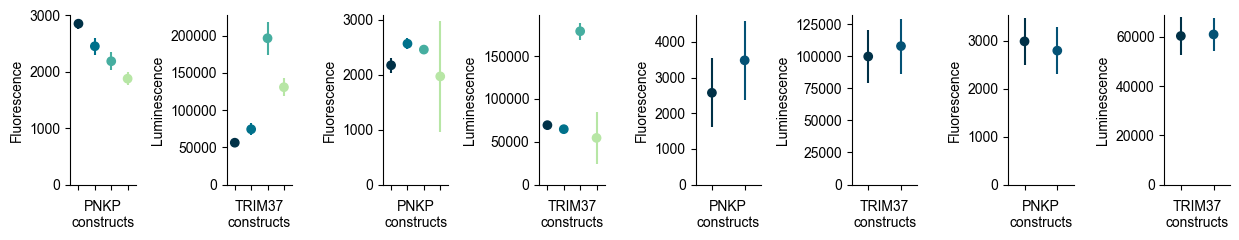

In [21]:
# plot the expression values for both partner proteins

plt.figure(figsize=(12.5,2.5))

avgFL_gr = bret_expr_df.groupby(['project_id','NL_plasmid_id','mCit_plasmid_id','NL_property','mCit_property'])['avg_FL'].aggregate(['mean','std']).reset_index()
avgLU_gr = bret_expr_df.groupby(['project_id','NL_plasmid_id','mCit_plasmid_id','NL_property','mCit_property'])['totLu'].aggregate(['mean','std']).reset_index()

for p,plasmid_pairs in enumerate(plasmid_pair_sets):

    plt.subplot(1,8,p*2+1)
    FL_values = []
    FL_std = []
    colors = []

    for plasmid_pair in plasmid_pairs:
        FL_values.append(list(avgFL_gr.loc[(avgFL_gr['NL_property']=='2ng') & 
                                          (avgFL_gr['mCit_property']=='50ng') & 
                                          (avgFL_gr['NL_plasmid_id']==plasmid_pair[0]) & 
                                          (avgFL_gr['mCit_plasmid_id']==plasmid_pair[1]) & 
                                          (avgFL_gr['project_id']==plasmid_pair[2]),'mean'])[0])

        FL_std.append(list(avgFL_gr.loc[(avgFL_gr['NL_property']=='2ng') & 
                                          (avgFL_gr['mCit_property']=='50ng') & 
                                          (avgFL_gr['NL_plasmid_id']==plasmid_pair[0]) & 
                                          (avgFL_gr['mCit_plasmid_id']==plasmid_pair[1]) & 
                                          (avgFL_gr['project_id']==plasmid_pair[2]),'std'])[0])
 
        colors.append(labels_colors[(plasmid_pair[0],plasmid_pair[1])][1])

    plt.errorbar(range(len(FL_values)),FL_values,yerr=FL_std,marker='',linestyle='',ecolor=colors)
    plt.scatter(range(len(FL_values)),FL_values,marker='o',color=colors)
    plt.ylabel('Fluorescence',fontsize=10)
    plt.xlabel('PNKP\nconstructs',fontsize=10)
    plt.ylim(bottom=0)
    plt.xlim(-0.5,len(FL_values)-0.5)
    plt.xticks(range(len(FL_values)),'')
    ax = plt.gca()
    ax.spines[['right', 'top']].set_visible(False)


    plt.subplot(1,8,p*2+2)
    LU_values = []
    LU_std = []

    for plasmid_pair in plasmid_pairs:
        LU_values.append(list(avgLU_gr.loc[(avgLU_gr['NL_property']=='2ng') & 
                                          (avgLU_gr['mCit_property']=='50ng') & 
                                          (avgLU_gr['NL_plasmid_id']==plasmid_pair[0]) & 
                                          (avgLU_gr['mCit_plasmid_id']==plasmid_pair[1]) & 
                                          (avgLU_gr['project_id']==plasmid_pair[2]),'mean'])[0])

        LU_std.append(list(avgLU_gr.loc[(avgLU_gr['NL_property']=='2ng') & 
                                          (avgLU_gr['mCit_property']=='50ng') & 
                                          (avgLU_gr['NL_plasmid_id']==plasmid_pair[0]) & 
                                          (avgLU_gr['mCit_plasmid_id']==plasmid_pair[1]) & 
                                          (avgLU_gr['project_id']==plasmid_pair[2]),'std'])[0])
 

    plt.errorbar(range(len(LU_values)),LU_values,yerr=LU_std,marker='',linestyle='',ecolor=colors)
    plt.scatter(range(len(LU_values)),LU_values,marker='o',color=colors)
    plt.ylabel('Luminescence',fontsize=10)
    plt.xlabel('TRIM37\nconstructs',fontsize=10)
    plt.xticks(range(len(LU_values)),'')
    plt.ylim(bottom=0)
    plt.xlim(-0.5,len(LU_values)-0.5)
    ax = plt.gca()
    ax.spines[['right', 'top']].set_visible(False)

    
plt.tight_layout()
plt.savefig(path+'TRIM37_PNKP_expr_Lu128r01_Lu129r01_Lu132r01_Lu133r01.pdf')
plt.savefig(path+'TRIM37_PNKP_expr_Lu128r01_Lu129r01_Lu132r01_Lu133r01.jpeg',dpi=300)
plt.show()